In [48]:
import igraph as ig
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce
from tqdm import tqdm

In [18]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rcParams.update({'font.size': 18})

# PageRank for tracking innovative compounds

Goal => use pagerank measures over time to find innovative cpds

## Goal 1: Innovation through distributions

Test actual pagerank values

- Increasing values = higher influence
- Persistently high value after increase = innovation

In [46]:
## Testing for values
fp = "G:Shared drives/SureChemBL_Patents/PageRank/"
pr_1980_01 = pickle.load(file=open(fp + "pagerank_1980-01.p", "rb"))
pr_1980_02 = pickle.load(file=open(fp + "pagerank_1980-02.p", "rb"))
pr_2019_11 = pickle.load(file=open(fp + "pagerank_2019-11.p", "rb"))
pr_2019_12 = pickle.load(file=open(fp + "pagerank_2019-12.p", "rb"))

df_1980_01 = pd.DataFrame(pr_1980_01, columns=["ID", "PR_1980_01"])
df_1980_02 = pd.DataFrame(pr_1980_02, columns=["ID", "PR_1980_02"])
df_2019_11 = pd.DataFrame(pr_2019_11, columns=["ID", "PR_2019_11"])
df_2019_12 = pd.DataFrame(pr_2019_12, columns=["ID", "PR_2019_12"])


Text(0, 0.5, 'Count')

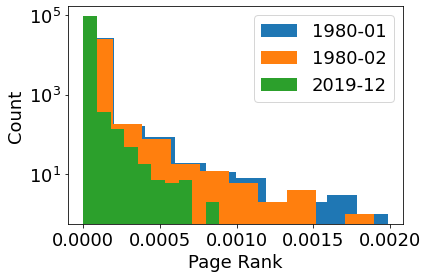

In [30]:
plt.hist(df_1980_01["PR_1980_01"], label="1980-01")
plt.hist(df_1980_02["PR_1980_02"], label="1980-02")
plt.hist(df_2019_12["PR_2019_12"], label="2019-12")

plt.yscale("log")

plt.legend()
plt.xlabel("Page Rank")
plt.ylabel("Count")

In [44]:
#Testing merging dataframes (its working!)

dataframes = [df_1980_01, df_1980_02, df_2019_11, df_2019_12]

df = reduce(lambda left, right: pd.merge(left, right, on=["ID"], how="outer"), dataframes)

print(df)

                     ID  PR_1980_01  PR_1980_02  PR_2019_11  PR_2019_12
0       SCHEMBL11422812    0.000030         NaN         NaN         NaN
1       SCHEMBL11488819    0.000029         NaN         NaN         NaN
2        SCHEMBL9429923    0.000051         NaN         NaN         NaN
3       SCHEMBL11245945    0.000019         NaN         NaN         NaN
4       SCHEMBL11486700    0.000034         NaN         NaN         NaN
...                 ...         ...         ...         ...         ...
352703  SCHEMBL21584018         NaN         NaN         NaN    0.000010
352704  SCHEMBL18147995         NaN         NaN         NaN    0.000013
352705  SCHEMBL21599701         NaN         NaN         NaN    0.000013
352706  SCHEMBL21602312         NaN         NaN         NaN    0.000010
352707  SCHEMBL21600585         NaN         NaN         NaN    0.000007

[352708 rows x 5 columns]


### Tidy data

Get all pagerank values for each compound, put them in a dataframe with each unique ID as a row

In [47]:
def build_month_list(start, end):
    """ Builds a list of all months in a given range

    Args:
        start (int): year describing the start of the data
        end (int): year describing the end of the data (inclusive)

    Returns:
        list: list of all update months in format "YYYY-MM"
    """
    updates = []
    for year in range(start, end + 1):  # all years through the given end
        for month in range(1, 13):  #include 12 months
            if month < 10:
                updates.append(str(year) + "-0" + str(month))
            else:
                updates.append(str(year) + "-" + str(month))

    return updates

In [58]:
months = build_month_list(1980, 2019)
dataframes = []

print("Loading dataframes...")
for month in tqdm(months):
    dataframes.append(pd.DataFrame(pickle.load(file=open(fp + "pagerank_" + str(month) + ".p", "rb")), 
        columns=["ID", str(month)]))

print("Merging dataframes...")
df = reduce(lambda left, right: pd.merge(left, right, on=["ID"], how="outer"), dataframes)

print(df)

fp = "G:Shared drives/SureChemBL_Patents/PageRank/"
df.to_csv(fp + "pageRank_data.csv")

Loading dataframes...


100%|██████████| 480/480 [04:52<00:00,  1.64it/s]


Merging dataframes...


MemoryError: Unable to allocate 132. MiB for an array with shape (8661923,) and data type complex128

In [52]:
df_noNA = df.dropna()

print(df_noNA)

                 ID   1980-01   1980-02   1980-03   1980-04   1980-05  \
13      SCHEMBL1748  0.000393  0.000362  0.000357  0.000299  0.000503   
27     SCHEMBL23098  0.000040  0.000088  0.000051  0.000037  0.000155   
40     SCHEMBL15681  0.000101  0.000019  0.000041  0.000115  0.000046   
48     SCHEMBL51803  0.000089  0.000042  0.000030  0.000026  0.000044   
56       SCHEMBL968  0.000342  0.000233  0.000374  0.000242  0.000278   
...             ...       ...       ...       ...       ...       ...   
26615  SCHEMBL80292  0.000381  0.000279  0.000233  0.000255  0.000247   
26691  SCHEMBL22165  0.000056  0.000034  0.000053  0.000019  0.000104   
26699  SCHEMBL19807  0.000056  0.000129  0.000045  0.000059  0.000025   
26730  SCHEMBL14893  0.000206  0.000310  0.000283  0.000185  0.000255   
26738  SCHEMBL15789  0.000127  0.000274  0.000208  0.000199  0.000317   

        1980-06   1980-07   1980-08   1980-09  ...   1984-03   1984-04  \
13     0.000431  0.000377  0.000607  0.000363  ..